# Political Fake News Detection

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Data Collection
- Google Drive

In [ ]:
# For Gdrive dataset
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
url1 = "/content/drive/MyDrive/DM & RM/dataset/True.csv"
url2 = "/content/drive/MyDrive/DM & RM/dataset/Fake.csv"

true = pd.read_csv(url1)
fake = pd.read_csv(url2)

## Data Understanding

In [ ]:
true.shape

(21417, 4)

In [ ]:
fake.shape

(23481, 4)

In [ ]:
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
fake.head()

,title,text,subject,date
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017"
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017"
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017"
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017"
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017"


In [ ]:
true['subject'].unique()

array(['politicsNews', 'worldnews'], dtype=object)

In [ ]:
fake['subject'].unique()

array(['News', 'politics', 'Government News', 'left-news', 'US_News',
       'Middle-east'], dtype=object)

### Check for Missing Values (Not Present)

In [ ]:
true.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

In [ ]:
fake.isnull().sum()

title      0
text       0
subject    0
date       0
dtype: int64

### Check Data Types

In [ ]:
true.dtypes

title      object
text       object
subject    object
date       object
dtype: object

In [ ]:
fake.dtypes

title      object
text       object
subject    object
date       object
dtype: object

### Check for Duplicates (Present)

In [ ]:
true[true.duplicated()]

,title,text,subject,date
445,Senate tax bill stalls on deficit-focused 'tri...,WASHINGTON (Reuters) - The U.S. Senate on Thur...,politicsNews,"November 30, 2017"
778,Trump warns 'rogue regime' North Korea of grav...,BEIJING (Reuters) - U.S. President Donald Trum...,politicsNews,"November 8, 2017"
892,"Republicans unveil tax cut bill, but the hard ...",WASHINGTON (Reuters) - U.S. House of Represent...,politicsNews,"November 2, 2017"
896,Trump taps Fed centrist Powell to lead U.S. ce...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"November 2, 2017"
974,"Two ex-Trump aides charged in Russia probe, th...",WASHINGTON (Reuters) - Federal investigators p...,politicsNews,"October 30, 2017"
...,...,...,...,...
21228,France unveils labor reforms in first step to ...,PARIS (Reuters) - French President Emmanuel Ma...,worldnews,"August 31, 2017"
21263,Guatemala top court sides with U.N. graft unit...,GUATEMALA CITY (Reuters) - Guatemala s top cou...,worldnews,"August 29, 2017"
21290,"Europeans, Africans agree renewed push to tack...",PARIS (Reuters) - Europe s big four continen...,worldnews,"August 28, 2017"
21353,Thailand's ousted PM Yingluck has fled abroad:...,BANGKOK (Reuters) - Ousted Thai prime minister...,worldnews,"August 25, 2017"


In [ ]:
fake[fake.duplicated()]

,title,text,subject,date
9942,HILLARY TWEETS MESSAGE In Defense Of DACA…OOPS...,No time to waste we've got to fight with eve...,politics,"Sep 9, 2017"
11446,FORMER DEMOCRAT WARNS Young Americans: “Rioter...,"Who is silencing political speech, physically...",politics,"Mar 10, 2017"
14925,[VIDEO] #BlackLivesMatter Terrorists Storm Dar...,They were probably just looking for a safe sp...,politics,"Nov 16, 2015"


### Check Frequent Words

In [ ]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image

In [ ]:
custom_stopwords = set(STOPWORDS)
custom_stopwords.update(["said", "will", "new", "percent", "say", "would", "says"])

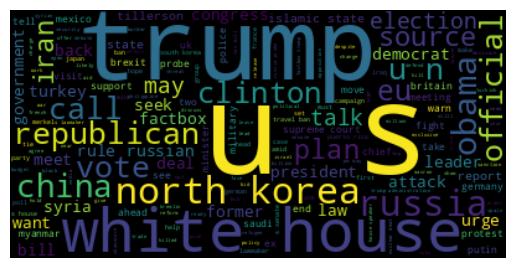

In [ ]:
text_real = true['title'].tolist()

# join the list and lowercase all the words
text_real = ' '.join(text_real).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = custom_stopwords,
                      collocations=True).generate(text_real)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

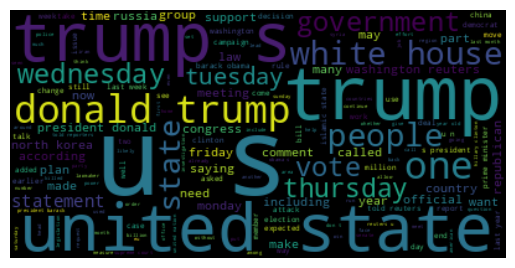

In [ ]:
text_real = true['text'].tolist()

# join the list and lowercase all the words
text_real = ' '.join(text_real).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = custom_stopwords,
                      collocations=True).generate(text_real)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

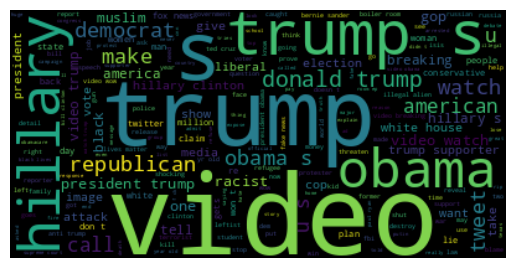

In [ ]:
text_fake = fake['title'].tolist()

# join the list and lowercase all the words
text_fake = ' '.join(text_fake).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = custom_stopwords,
                      collocations=True).generate(text_fake)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

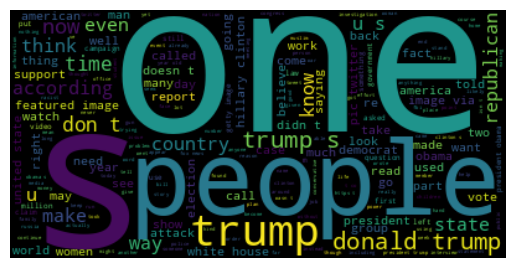

In [ ]:
text_fake = fake['text'].tolist()

# join the list and lowercase all the words
text_fake = ' '.join(text_fake).lower()

#create the wordcloud object
wordcloud = WordCloud(stopwords = custom_stopwords,
                      collocations=True).generate(text_fake)

#plot the wordcloud object
plt.imshow(wordcloud, interpolation='bilInear')
plt.axis('off')
plt.show()

### Check Distribution of News Based on the Subjects

Text(0, 0.5, 'Subjects')

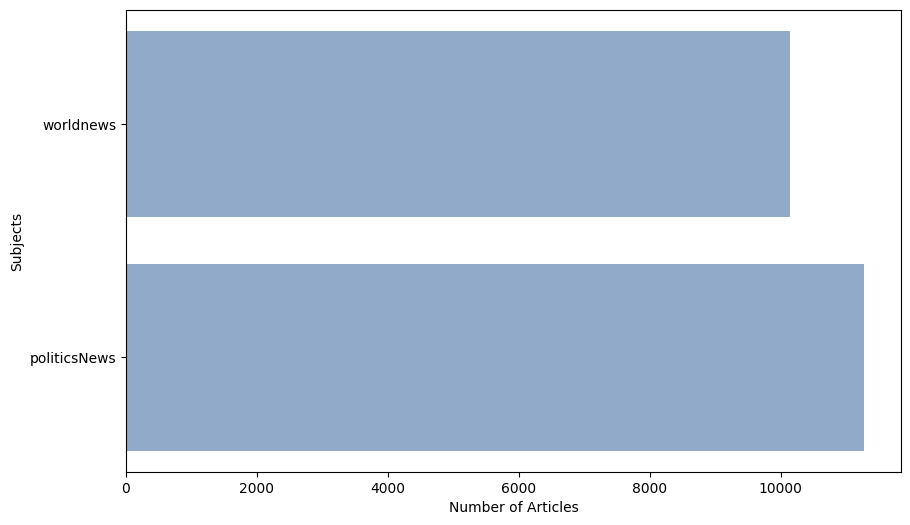

In [ ]:
grouped_true = true.groupby('subject').size()
true_subjects = grouped_true.index
true_news = grouped_true.values

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(true_subjects, true_news, color='#91aac9')
ax.set_xlabel('Number of Articles')
ax.set_ylabel('Subjects')

Text(0, 0.5, 'Subjects')

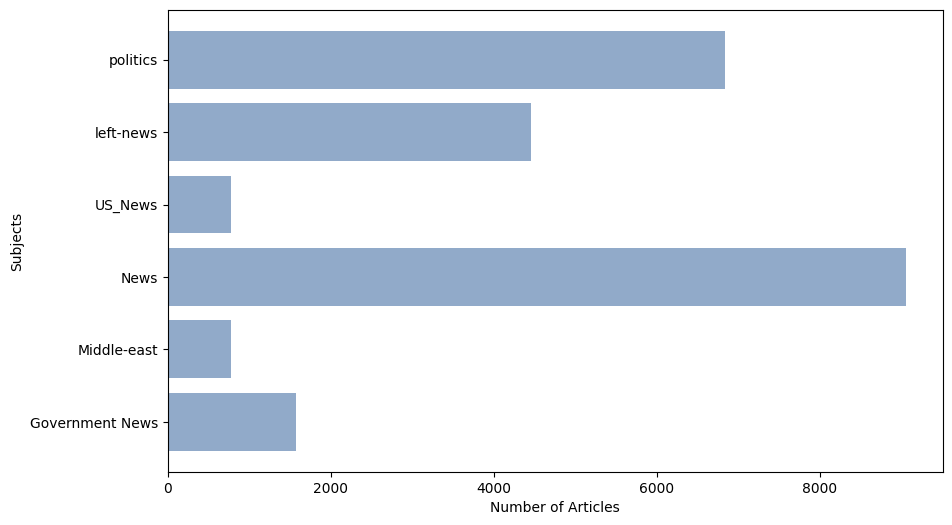

In [ ]:
grouped_fake = fake.groupby('subject').size()
fake_subjects = grouped_fake.index
fake_news = grouped_fake.values

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(fake_subjects, fake_news, color='#91aac9')
ax.set_xlabel('Number of Articles')
ax.set_ylabel('Subjects')

Word frequent using Counter

In [ ]:
!pip install nltk

import nltk
nltk.download('punkt')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Top 10 words in Title True News :
         Word  Frequency
0       trump       4741
1       house       1437
2       north        924
3       white        815
4      russia        804
5       korea        804
6      senate        739
7       court        711
8        bill        682
9  republican        631

Top 10 words in Content True News 
         Word  Frequency
0       trump      54266
1     reuters      28403
2   president      26454
3       state      19756
4  government      18317
5      states      16629
6       house      16547
7      united      15574
8  republican      15348
9      people      15254

Top 10 words in Title Fake News :
        Word  Frequency
0      trump       8688
1      video       8324
2      obama       2476
3    hillary       2187
4      watch       1899
5    clinton       1099
6  president       1089
7   breaking        880


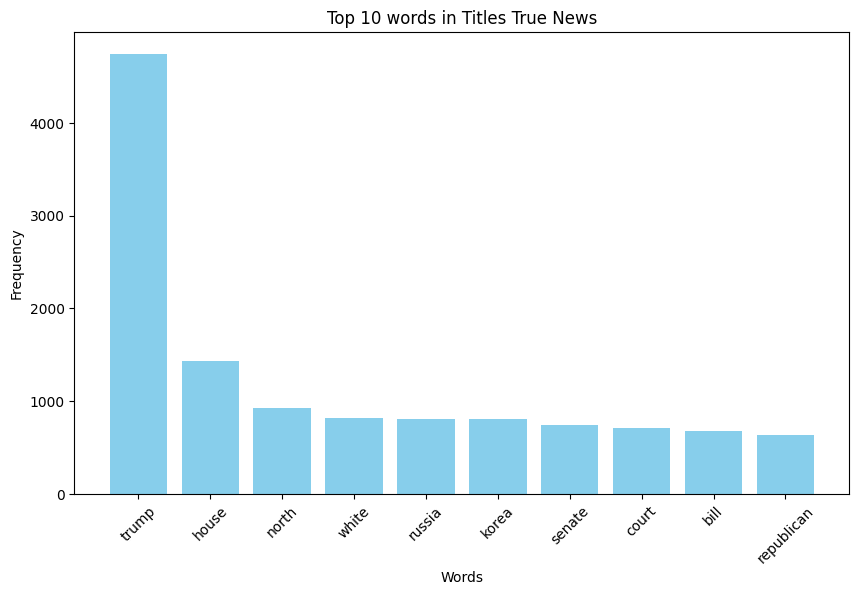

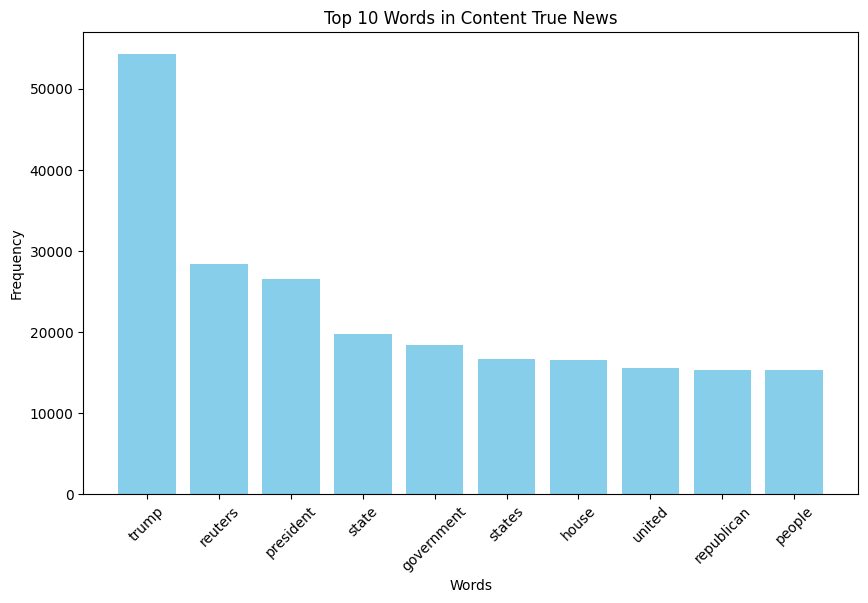

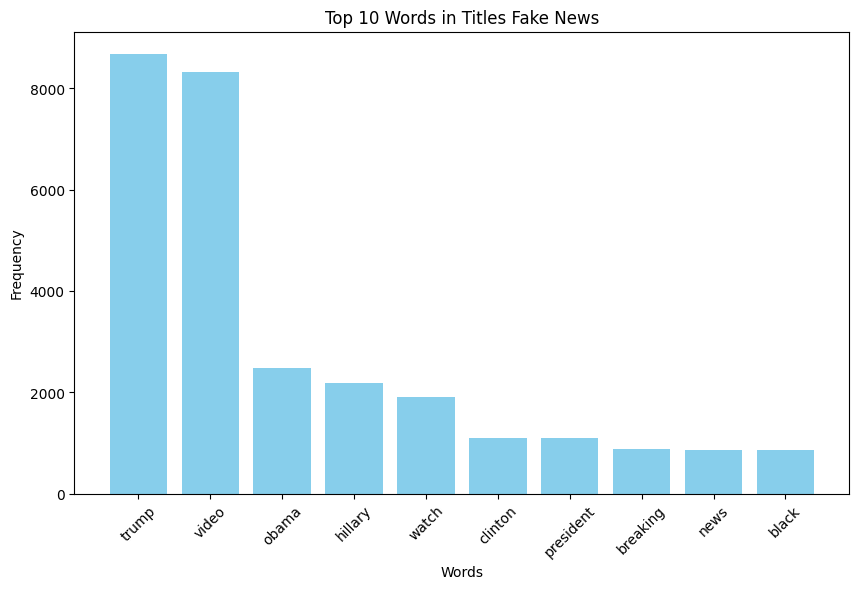

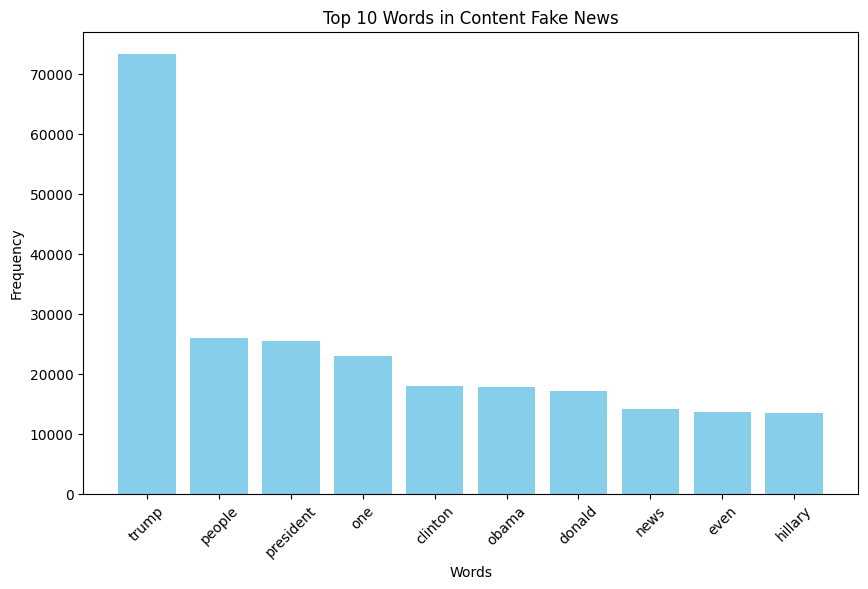

In [ ]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# Define a function to preprocess the text
def preprocess_text(text):
    text = text.translate(str.maketrans('', '', string.punctuation))
    text = text.lower()
    words = word_tokenize(text)
    stop_words = set(stopwords.words('english'))
    custom_stopwords = set(["said", "will", "new", "percent", "say","would","like","us","also","says"])
    all_stopwords = stop_words.union(custom_stopwords)
    words = [word for word in words if word.isalpha() and word not in all_stopwords]
    return words

# Preprocess titles and texts separately
true_titles = ' '.join(true['title'].tolist())
true_texts = ' '.join(true['text'].tolist())
fake_titles = ' '.join(fake['title'].tolist())
fake_texts = ' '.join(fake['text'].tolist())

true_title_words = preprocess_text(true_titles)
true_text_words = preprocess_text(true_texts)
fake_title_words = preprocess_text(fake_titles)
fake_text_words = preprocess_text(fake_texts)

# Count word frequencies
true_title_word_freq = Counter(true_title_words)
true_text_word_freq = Counter(true_text_words)
fake_title_word_freq = Counter(fake_title_words)
fake_text_word_freq = Counter(fake_text_words)

# Sort the word frequencies
sorted_true_title_word_freq = true_title_word_freq.most_common()
sorted_true_text_word_freq = true_text_word_freq.most_common()
sorted_fake_title_word_freq = fake_title_word_freq.most_common()
sorted_fake_text_word_freq = fake_text_word_freq.most_common()

# Convert to DataFrame for better visualization
true_title_word_freq_df = pd.DataFrame(sorted_true_title_word_freq, columns=['Word', 'Frequency'])
true_text_word_freq_df = pd.DataFrame(sorted_true_text_word_freq, columns=['Word', 'Frequency'])
fake_title_word_freq_df = pd.DataFrame(sorted_fake_title_word_freq, columns=['Word', 'Frequency'])
fake_text_word_freq_df = pd.DataFrame(sorted_fake_text_word_freq, columns=['Word', 'Frequency'])

# Display the top 10 words for titles and texts
print("Top 10 words in Title True News :")
print(true_title_word_freq_df.head(10))

print("\nTop 10 words in Content True News ")
print(true_text_word_freq_df.head(10))

print("\nTop 10 words in Title Fake News :")
print(fake_title_word_freq_df.head(10))

print("\nTop 10 words in Content Fake News :")
print(fake_text_word_freq_df.head(10))

# Plotting the word frequencies
import matplotlib.pyplot as plt

def plot_word_frequencies(word_freq_df, title):
    plt.figure(figsize=(10, 6))
    plt.bar(word_freq_df['Word'][:10], word_freq_df['Frequency'][:10], color='skyblue')
    plt.xlabel('Words')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=45)
    plt.show()

plot_word_frequencies(true_title_word_freq_df, 'Top 10 words in Titles True News')
plot_word_frequencies(true_text_word_freq_df, 'Top 10 Words in Content True News')
plot_word_frequencies(fake_title_word_freq_df, 'Top 10 Words in Titles Fake News')
plot_word_frequencies(fake_text_word_freq_df, 'Top 10 Words in Content Fake News')


## Data Preprocessing

### Data Labeling
- True -> 1
- Fake -> 0

In [ ]:
true['label'] = 1
true.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
fake['label'] = 0
fake.head()

,title,text,subject,date,label
0,Donald Trump Sends Out Embarrassing New Year’...,Donald Trump just couldn t wish all Americans ...,News,"December 31, 2017",0
1,Drunk Bragging Trump Staffer Started Russian ...,House Intelligence Committee Chairman Devin Nu...,News,"December 31, 2017",0
2,Sheriff David Clarke Becomes An Internet Joke...,"On Friday, it was revealed that former Milwauk...",News,"December 30, 2017",0
3,Trump Is So Obsessed He Even Has Obama’s Name...,"On Christmas day, Donald Trump announced that ...",News,"December 29, 2017",0
4,Pope Francis Just Called Out Donald Trump Dur...,Pope Francis used his annual Christmas Day mes...,News,"December 25, 2017",0


### Data Integration

In [ ]:
df = pd.concat([true, fake], axis = 0)
df.head()

,title,text,subject,date,label
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017",1
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017",1
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017",1
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017",1
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017",1


In [ ]:
df.shape

(44898, 5)

### Data Shuffling
The previously integrated data are separated evenly for real and fake data in the distribution. Therefore, the order is shuffled to ensure random sampling

In [ ]:
shuffled_df = df.sample(n = df.shape[0])

In [ ]:
shuffled_df.reset_index(inplace = True)

In [ ]:
shuffled_df.head()

,index,title,text,subject,date,label
0,990,White House says Trump will announce Fed chair...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"October 27, 2017",1
1,9292,Everytown gun safety group backs Clinton for p...,WASHINGTON (Reuters) - A gun control advocacy ...,politicsNews,"June 3, 2016",1
2,2249,Trump appoints Chatterjee to chair energy comm...,WASHINGTON (Reuters) - The White House said on...,politicsNews,"August 10, 2017",1
3,1458,U.S. gets warm words from China's Xi ahead of ...,BEIJING (Reuters) - Chinese President Xi Jinpi...,politicsNews,"September 30, 2017",1
4,8363,Jesus Appears On Kimmel To Read GOP Quotes An...,Republicans often claim Jesus as one of their ...,News,"February 3, 2016",0


### Feature Selection
- index, subject and date are irrelevant features for the prediction

In [ ]:
shuffled_df.drop(['index', 'subject', 'date'], axis = 1, inplace = True)

In [ ]:
shuffled_df.head()

,title,text,label
0,White House says Trump will announce Fed chair...,WASHINGTON (Reuters) - President Donald Trump ...,1
1,Everytown gun safety group backs Clinton for p...,WASHINGTON (Reuters) - A gun control advocacy ...,1
2,Trump appoints Chatterjee to chair energy comm...,WASHINGTON (Reuters) - The White House said on...,1
3,U.S. gets warm words from China's Xi ahead of ...,BEIJING (Reuters) - Chinese President Xi Jinpi...,1
4,Jesus Appears On Kimmel To Read GOP Quotes An...,Republicans often claim Jesus as one of their ...,0


### Data Cleaning

#### Removing Duplicates

In [ ]:
shuffled_df[shuffled_df.duplicated()]

,title,text,label
1108,WOW! LOOK WHO PAID For The Russia Dossier That...,Will Trump s AG Jeff Sessions allow Crooked Hi...,0
1121,WATCH CRAZED LEFTIES PROTESTING TRUMP Shut Dow...,THIS IS SO IRONIC! CRAZED LEFTISTS with an ant...,0
1243,BOYCOTT TRUMP APP LIST BACKFIRES…Shoppers Usin...,Here s the link to the app: BOYCOTT TRUMP This...,0
1338,GERMAN RESIDENTS FIGHT BACK: Anti-Islamic Song...,Apparently these Germans are not interested in...,0
1608,NOT KIDDING: Obama’s Weak Immigrant Vetting Pr...,This new information just adds more validity T...,0
...,...,...,...
44873,POVERTY PIMP AL SHARPTON USES THE BIBLE To Say...,He s being nominated to sit in Garland s seat...,0
44878,CNN’s Hostile Treatment of Congresswoman Tulsi...,"21st Century Wire says Recently, Democrat Hawa...",0
44881,[VIDEO] #BlackLivesMatter ACTIVIST POSTS STAGE...,Meet Keegan Stephan. He could be Barack Obama ...,0
44888,IMAM SLAMS CBS News For Trying To “Make Terror...,"Yesterday, the Imam who calls himself the Ima...",0


In [ ]:
shuffled_df = shuffled_df.drop_duplicates()

In [ ]:
shuffled_df[shuffled_df.duplicated()]

,title,text,label


#### Removing Stop Words

In [ ]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import re
import string

In [ ]:
# nltk.download('stopwords')
# nltk.download('punkt')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
def clean_text(text):
    '''
        Make text lowercase, remove text in square brackets,remove links,remove punctuation and remove words containing numbers.
    '''
    text = str(text).lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text) # remove urls
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text) # remove punctuation
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [ ]:
# Define stop words
stop_words = set(stopwords.words('english'))

# Function to remove stop words
def remove_stop_words(text):
    text = clean_text(text)
    tokens = word_tokenize(text.lower())
    filtered_tokens = [word for word in tokens if word not in stop_words]
    return ' '.join(filtered_tokens)

# Apply the function
shuffled_df['clean_text'] = shuffled_df['text'].apply(remove_stop_words)

## Splitting Data (Stratified Hold-Out)
- Training Set -> 70%
- Validation Set -> 15%
- Testing Set -> 15%

In [ ]:
shuffled_df['clean_text'] = shuffled_df['clean_text'].astype(str)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_temp, Y_train, Y_temp = train_test_split(shuffled_df['clean_text'], shuffled_df['label'], random_state = 0, test_size = 0.3, stratify = shuffled_df['label'])

X_val, X_test, Y_val, Y_test = train_test_split(X_temp, Y_temp, random_state = 0, test_size = 0.5, stratify = Y_temp)

## Data Preprocessing: Data Transformation
- Tokenization
- Masking
- Transforming Tensors into Tensor Dataset

In [ ]:
import torch
import torch.nn as nn
import transformers
from transformers import AutoModel, BertTokenizerFast

In [ ]:
bert = AutoModel.from_pretrained('bert-base-uncased')

config.json:   0%|          | 0.00/570 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/440M [00:00<?, ?B/s]

In [ ]:
tokenizer = BertTokenizerFast.from_pretrained('bert-base-uncased')

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

In [ ]:
X_test.head(10)

40726    president obama using final state union addres...
36391    sittwe myanmar reuters thousands rohingya musl...
7966     tegucigalpa reuters honduran opposition battli...
7094     please note profanity sixth paragraph isla bin...
7569     paris reuters marine le pen acted reassert aut...
36949    istanbulbaghdad reuters turkey parliament vote...
17725    vienna reuters number figure austria ruling so...
14884    washington reuters us president donald trump s...
17195    conservatives used majority supreme court kill...
40018    dublin reuters ireland minority government loo...
Name: clean_text, dtype: object

In [ ]:
X_train.head(10)

261      lame effort score political points hillary cli...
26403    cairo reuters sudan summoned us charge ’ affai...
9743     washington reuters us treasury secretary steve...
32195    united nations reuters united states said wedn...
12335    think really laughable obama officially declar...
25134    jerusalem reuters israeli military said reinfo...
19557    century wire says may day riots designer techn...
43810    anyone paying attention tell obama agenda come...
32270    johannesburg reuters south africa government p...
40580    saw live cavuto great ted turner jr stumping b...
Name: clean_text, dtype: object

#### Tokenization & Masking
- done in batches

In [ ]:
tokens_train = tokenizer.batch_encode_plus(
    X_train.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the validation set
tokens_val = tokenizer.batch_encode_plus(
    X_val.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

# tokenize and encode sequences in the test set
tokens_test = tokenizer.batch_encode_plus(
    X_test.tolist(),
    max_length = 25,
    pad_to_max_length=True,
    truncation=True
)

#### Transform Tokenized Data & Masks Into Tensors

In [ ]:
train_seq = torch.tensor(tokens_train['input_ids'])
train_mask = torch.tensor(tokens_train['attention_mask'])
train_y = torch.tensor(Y_train.tolist())

val_seq = torch.tensor(tokens_val['input_ids'])
val_mask = torch.tensor(tokens_val['attention_mask'])
val_y = torch.tensor(Y_val.tolist())

test_seq = torch.tensor(tokens_test['input_ids'])
test_mask = torch.tensor(tokens_test['attention_mask'])
test_y = torch.tensor(Y_test.tolist())

#### Preparing The Data For Use In PyTorch Modeling
- Transform into Tensor Dataset

In [ ]:
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler

#define a batch size
batch_size = 32

# wrap tensors
train_data = TensorDataset(train_seq, train_mask, train_y)

# sampler for sampling the data during training
train_sampler = RandomSampler(train_data)

# dataLoader for train set
train_dataloader = DataLoader(train_data, sampler=train_sampler, batch_size=batch_size)


# wrap tensors
val_data = TensorDataset(val_seq, val_mask, val_y)

# sampler for sampling the data during training
val_sampler = SequentialSampler(val_data)

# dataLoader for validation set
val_dataloader = DataLoader(val_data, sampler = val_sampler, batch_size=batch_size)


# wrap tensors
test_data = TensorDataset(test_seq, test_mask, test_y)

# sampler for sampling the data during training
test_sampler = SequentialSampler(test_data)

# dataLoader for validation set
test_dataloader = DataLoader(test_data, sampler = test_sampler, batch_size=batch_size)

## Feature Extraction
- BERT Encoding

In [ ]:
features = []
labels = []

In [ ]:
for batch in train_dataloader:
    batch_seq, batch_mask, batch_y = batch

    with torch.no_grad():
        outputs = bert(batch_seq, attention_mask=batch_mask)
        pooled_output = outputs.pooler_output  # Shape: [batch_size, hidden_size]

    features.append(pooled_output.numpy())
    labels.append(batch_y.numpy())

features = np.concatenate(features, axis=0)
labels = np.concatenate(labels, axis=0)

In [ ]:
val_features = []
val_labels = []

In [ ]:
for batch in val_dataloader:
    batch_seq, batch_mask, batch_y = batch

    with torch.no_grad():
        outputs = bert(batch_seq, attention_mask=batch_mask)
        pooled_output = outputs.pooler_output  # Shape: [batch_size, hidden_size]

    val_features.append(pooled_output.numpy())
    val_labels.append(batch_y.numpy())

# Convert lists to numpy arrays
val_features = np.concatenate(val_features, axis=0)
val_labels = np.concatenate(val_labels, axis=0)

In [ ]:
test_features = []
test_labels = []

In [ ]:
for batch in test_dataloader:
    batch_seq, batch_mask, batch_y = batch

    with torch.no_grad():
        outputs = bert(batch_seq, attention_mask=batch_mask)
        pooled_output = outputs.pooler_output  # Shape: [batch_size, hidden_size]

    test_features.append(pooled_output.numpy())
    test_labels.append(batch_y.numpy())

# Convert lists to numpy arrays
test_features = np.concatenate(test_features, axis=0)
test_labels = np.concatenate(test_labels, axis=0)

## Data Mining/Modeling
- XGBoost

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score, classification_report

# Create the DMatrix for XGBoost
dtrain = xgb.DMatrix(features, label=labels)

# Set up the parameters
params = {
    'objective': 'binary:logistic',  # Assuming a binary classification task
    'max_depth': 6,
    'eta': 0.3,
    'eval_metric': 'logloss'
}

# Train the model
bst = xgb.train(params, dtrain, num_boost_round=100)

## Model Evaluation

### Training

In [ ]:
y_pred_train = bst.predict(dtrain)
predictions_train = [round(value) for value in y_pred_train]
train_accuracy = accuracy_score(labels, predictions_train)
print(f"Training Accuracy: {train_accuracy:.4f}")
print(classification_report(labels, predictions_train))

Training Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     12535
           1       1.00      1.00      1.00     14838

    accuracy                           1.00     27373
   macro avg       1.00      1.00      1.00     27373
weighted avg       1.00      1.00      1.00     27373



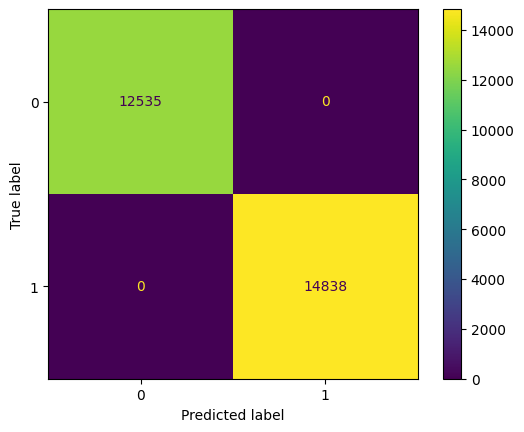

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(labels, predictions_train)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Validation

In [ ]:
dval = xgb.DMatrix(val_features, label=val_labels)
y_pred = bst.predict(dval)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(val_labels, predictions)
print(f"Validation Accuracy: {accuracy:.4f}")
print(classification_report(val_labels, predictions))

Validation Accuracy: 0.9736
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2686
           1       0.98      0.97      0.98      3180

    accuracy                           0.97      5866
   macro avg       0.97      0.97      0.97      5866
weighted avg       0.97      0.97      0.97      5866



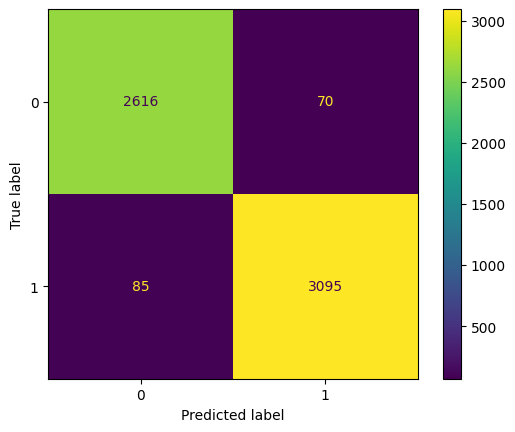

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(val_labels, predictions)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()

### Testing

In [ ]:
dtest = xgb.DMatrix(test_features, label=test_labels)
y_test_pred = bst.predict(dtest)
predictions_test = [round(value) for value in y_test_pred]
accuracy = accuracy_score(test_labels, predictions_test)
print(f"Testing Accuracy: {accuracy:.4f}")
print(classification_report(test_labels, predictions_test))

Testing Accuracy: 0.9688
              precision    recall  f1-score   support

           0       0.97      0.97      0.97      2687
           1       0.97      0.97      0.97      3179

    accuracy                           0.97      5866
   macro avg       0.97      0.97      0.97      5866
weighted avg       0.97      0.97      0.97      5866



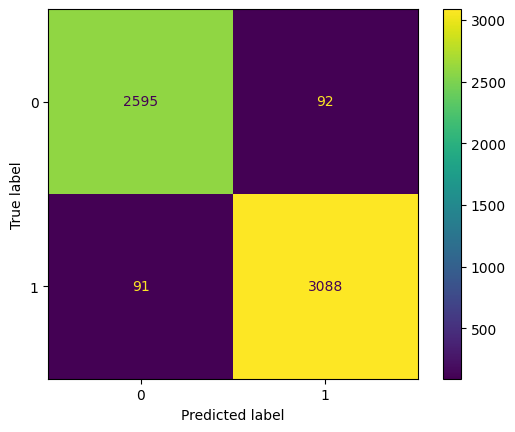

In [ ]:
from sklearn import metrics

confusion_matrix = metrics.confusion_matrix(test_labels, predictions_test)

cm_display = metrics.ConfusionMatrixDisplay(confusion_matrix = confusion_matrix, display_labels = [0, 1])

cm_display.plot()
plt.show()